In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-04T23:56:02.858387+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

teeplot: 1.4.2
sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
seaborn: 0.13.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_make_cv_sim_recipe": "make_cv_sim_uk",
    "cfg_make_wt_specs_recipe": "make_wt_specs_uk",
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_make_cv_sim_recipe': 'make_cv_sim_uk',
 'cfg_make_wt_specs_recipe': 'make_wt_specs_uk',
 'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.47582387924194336}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.003951311111450195}
!!! {"init_...": 0.0005888938903808594}
!!! {"ete3Tree": 0.6517794132232666}
!!! {"GenomeTree_hierarchical": 0.0029244422912597656}
!!! {"mutateBranchETEhierarchy": 0.09729313850402832}
!!! {"write_genome_short": 0.04893326759338379}


  4%|▍         | 8/193 [00:03<00:53,  3.44it/s]

!!! {"writeGenomeNoIndels": 0.1737957000732422}
!!! {"pl.DataFrame": 0.04468107223510742}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 1.029294729232788}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.017267704010009766}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033829212188720703}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014019012451171875}
!!! {"init_...": 0.0004973411560058594}
!!! {"ete3Tree": 7.700920104980469e-05}
!!! {"GenomeTree_hierarchical": 0.002162456512451172}
!!! {"mutateBranchETEhierarchy": 1.4781951904296875e-05}
!!! {"write_genome_short": 7.22408294677734

  7%|▋         | 14/193 [00:03<00:26,  6.83it/s]

!!! {"phastSimRun": 0.00010824203491210938}
!!! {"init_...": 0.0005843639373779297}
!!! {"ete3Tree": 0.0008065700531005859}
!!! {"GenomeTree_hierarchical": 0.002663850784301758}
!!! {"mutateBranchETEhierarchy": 0.00015091896057128906}
!!! {"write_genome_short": 0.00016188621520996094}
!!! {"writeGenomeNoIndels": 0.00023937225341796875}
!!! {"pl.DataFrame": 0.0001347064971923828}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00690913200378418}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00025463104248046875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031647682189941406}
enter log_context_duration for 

 13%|█▎        | 26/193 [00:03<00:11, 14.79it/s]

!!! {"phastSimRun": 0.00015282630920410156}
!!! {"init_...": 0.0006113052368164062}
!!! {"ete3Tree": 0.02017998695373535}
!!! {"GenomeTree_hierarchical": 0.0019960403442382812}
!!! {"mutateBranchETEhierarchy": 0.0050506591796875}
!!! {"write_genome_short": 0.0023288726806640625}
!!! {"writeGenomeNoIndels": 0.00794672966003418}
!!! {"pl.DataFrame": 0.0016012191772460938}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04223513603210449}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000926971435546875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003194093704223633}
enter log_context_duration for _do_run_pha

 17%|█▋        | 33/193 [00:03<00:07, 20.48it/s]

!!! {"phastSimRun": 0.0001220703125}
!!! {"init_...": 0.0006163120269775391}
!!! {"ete3Tree": 0.0004181861877441406}
!!! {"GenomeTree_hierarchical": 0.0021238327026367188}
!!! {"mutateBranchETEhierarchy": 0.00010013580322265625}
!!! {"write_genome_short": 0.00011134147644042969}
!!! {"writeGenomeNoIndels": 0.00014495849609375}
!!! {"pl.DataFrame": 0.0001087188720703125}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00586390495300293}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002319812774658203}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031337738037109375}
enter log_context_duration for _do_run_ph

 24%|██▍       | 46/193 [00:03<00:04, 30.09it/s]

!!! {"write_genome_short": 0.0005879402160644531}
!!! {"writeGenomeNoIndels": 1.1205673217773438e-05}
!!! {"pl.DataFrame": 7.891654968261719e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005818843841552734}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00019097328186035156}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=3540, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008522987365722656}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012087821960449219}
!!! {"init_...": 0.0004341602325439453}
!!! {"ete3Tree": 0.020687341690063477}
!!! {"GenomeTree_hierarchical": 0.0026314258575439453}
!!! {"mutateBranchETEhierarchy": 0.004

 31%|███       | 59/193 [00:04<00:03, 41.48it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.765655517578125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003465890884399414}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010585784912109375}
!!! {"init_...": 0.00044465065002441406}
!!! {"ete3Tree": 6.079673767089844e-05}
!!! {"GenomeTree_hierarchical": 0.0021195411682128906}
!!! {"mutateBranchETEhierarchy": 1.0728836059570312e-05}
!!! {"write_genome_short": 6.67572021484375e-05}
!!! {"writeGenomeNoIndels": 6.198883056640625e-06}
!!! {"pl.DataFrame": 9.131431579589844e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004583120346069336}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000182

 37%|███▋      | 71/193 [00:04<00:02, 48.55it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.7179718017578125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0034635066986083984}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011754035949707031}
!!! {"init_...": 0.0004189014434814453}
!!! {"ete3Tree": 6.4849853515625e-05}
!!! {"GenomeTree_hierarchical": 0.0031604766845703125}
!!! {"mutateBranchETEhierarchy": 1.1920928955078125e-05}
!!! {"write_genome_short": 8.463859558105469e-05}
!!! {"writeGenomeNoIndels": 7.152557373046875e-06}
!!! {"pl.DataFrame": 8.702278137207031e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005682706832885742}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000227

 40%|███▉      | 77/193 [00:04<00:02, 50.70it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004531145095825195}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012111663818359375}
!!! {"init_...": 0.00041794776916503906}
!!! {"ete3Tree": 0.001669168472290039}
!!! {"GenomeTree_hierarchical": 0.002993345260620117}
!!! {"mutateBranchETEhierarchy": 0.0003516674041748047}
!!! {"write_genome_short": 0.00028705596923828125}
!!! {"writeGenomeNoIndels": 0.0006127357482910156}
!!! {"pl.DataFrame": 0.00021266937255859375}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.008597612380981445}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002675056457519531}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_

 43%|████▎     | 83/193 [00:04<00:02, 39.49it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008886098861694336}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013899803161621094}
!!! {"init_...": 0.0005044937133789062}
!!! {"ete3Tree": 0.02103734016418457}
!!! {"GenomeTree_hierarchical": 0.0021703243255615234}
!!! {"mutateBranchETEhierarchy": 0.006491422653198242}
!!! {"write_genome_short": 0.002589702606201172}
!!! {"writeGenomeNoIndels": 0.008286714553833008}
!!! {"pl.DataFrame": 0.0015988349914550781}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0447688102722168}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009582042694091797}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=22, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick

 50%|█████     | 97/193 [00:04<00:02, 44.71it/s]

!!! {"ete3Tree": 0.02630472183227539}
!!! {"GenomeTree_hierarchical": 0.002680063247680664}
!!! {"mutateBranchETEhierarchy": 0.0060138702392578125}
!!! {"write_genome_short": 0.0032072067260742188}
!!! {"writeGenomeNoIndels": 0.010469436645507812}
!!! {"pl.DataFrame": 0.0024154186248779297}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.05350828170776367}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0010881423950195312}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=5, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003241300582885742}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013518333435058594}
!!! {"init_...": 0.00045490264

 56%|█████▋    | 109/193 [00:05<00:01, 46.56it/s]

!!! {"init_...": 0.001184701919555664}
!!! {"ete3Tree": 0.011403083801269531}
!!! {"GenomeTree_hierarchical": 0.0020830631256103516}
!!! {"mutateBranchETEhierarchy": 0.002473115921020508}
!!! {"write_genome_short": 0.0012860298156738281}
!!! {"writeGenomeNoIndels": 0.0044820308685302734}
!!! {"pl.DataFrame": 0.0009438991546630859}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.02568840980529785}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0006232261657714844}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=13, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003251791000366211}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013995170

 60%|██████    | 116/193 [00:05<00:01, 49.72it/s]

!!! {"phastSimRun": 0.00012040138244628906}
!!! {"init_...": 0.0005488395690917969}
!!! {"ete3Tree": 6.389617919921875e-05}
!!! {"GenomeTree_hierarchical": 0.002145528793334961}
!!! {"mutateBranchETEhierarchy": 1.0728836059570312e-05}
!!! {"write_genome_short": 7.152557373046875e-05}
!!! {"writeGenomeNoIndels": 6.9141387939453125e-06}
!!! {"pl.DataFrame": 8.368492126464844e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00579833984375}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00022101402282714844}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031387805938720703}
enter log_context_duration for _do_

 66%|██████▋   | 128/193 [00:05<00:01, 51.46it/s]

!!! {"phastSimRun": 0.0001246929168701172}
!!! {"init_...": 0.0005645751953125}
!!! {"ete3Tree": 6.413459777832031e-05}
!!! {"GenomeTree_hierarchical": 0.002117156982421875}
!!! {"mutateBranchETEhierarchy": 1.049041748046875e-05}
!!! {"write_genome_short": 0.00010538101196289062}
!!! {"writeGenomeNoIndels": 6.9141387939453125e-06}
!!! {"pl.DataFrame": 7.677078247070312e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005661725997924805}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00018930435180664062}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=5, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003137826919555664}
enter log_context_duration for _do_

 74%|███████▎  | 142/193 [00:05<00:00, 56.73it/s]

!!! {"phastSimRun": 0.00011682510375976562}
!!! {"init_...": 0.0005779266357421875}
!!! {"ete3Tree": 7.224082946777344e-05}
!!! {"GenomeTree_hierarchical": 0.0021986961364746094}
!!! {"mutateBranchETEhierarchy": 1.3113021850585938e-05}
!!! {"write_genome_short": 8.749961853027344e-05}
!!! {"writeGenomeNoIndels": 1.0728836059570312e-05}
!!! {"pl.DataFrame": 7.891654968261719e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005707502365112305}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00019884109497070312}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003154277801513672}
enter log_context_duration for

 77%|███████▋  | 148/193 [00:06<00:01, 43.22it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=4595, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.010314226150512695}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001251697540283203}
!!! {"init_...": 0.0004470348358154297}
!!! {"ete3Tree": 0.027777433395385742}
!!! {"GenomeTree_hierarchical": 0.002647876739501953}
!!! {"mutateBranchETEhierarchy": 0.0062143802642822266}
!!! {"write_genome_short": 0.003168344497680664}
!!! {"writeGenomeNoIndels": 0.01112222671508789}
!!! {"pl.DataFrame": 0.0026640892028808594}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0559689998626709}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00119209289

 80%|████████  | 155/193 [00:06<00:00, 44.45it/s]

!!! {"phastSimRun": 0.00010824203491210938}
!!! {"init_...": 0.0005512237548828125}
!!! {"ete3Tree": 7.271766662597656e-05}
!!! {"GenomeTree_hierarchical": 0.002148866653442383}
!!! {"mutateBranchETEhierarchy": 1.2874603271484375e-05}
!!! {"write_genome_short": 8.487701416015625e-05}
!!! {"writeGenomeNoIndels": 1.049041748046875e-05}
!!! {"pl.DataFrame": 8.249282836914062e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00508880615234375}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00020384788513183594}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=7, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003142833709716797}
enter log_context_duration for _d

 83%|████████▎ | 160/193 [00:07<00:02, 11.92it/s]

!!! {"mutateBranchETEhierarchy": 0.04775571823120117}
!!! {"write_genome_short": 0.023410558700561523}
!!! {"writeGenomeNoIndels": 0.07265782356262207}
!!! {"pl.DataFrame": 0.012537240982055664}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.3337886333465576}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0060272216796875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032262802124023438}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013709068298339844}
!!! {"init_...": 0.0004627704620361328}
!!! {"ete3Tree": 8.368492126464844e-05}
!!! {"GenomeTree_hierarchical": 0.0022535324096679

 85%|████████▌ | 165/193 [00:07<00:01, 14.69it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=1503, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0057065486907958984}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.000141143798828125}
!!! {"init_...": 0.0004439353942871094}
!!! {"ete3Tree": 0.00933384895324707}
!!! {"GenomeTree_hierarchical": 0.002035379409790039}
!!! {"mutateBranchETEhierarchy": 0.002141237258911133}
!!! {"write_genome_short": 0.0011816024780273438}
!!! {"writeGenomeNoIndels": 0.0034720897674560547}
!!! {"pl.DataFrame": 0.0007085800170898438}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.021074771881103516}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00057125

 92%|█████████▏| 178/193 [00:08<00:00, 21.97it/s]

!!! {"ete3Tree": 0.06419920921325684}
!!! {"GenomeTree_hierarchical": 0.002016305923461914}
!!! {"mutateBranchETEhierarchy": 0.015753746032714844}
!!! {"write_genome_short": 0.0075740814208984375}
!!! {"writeGenomeNoIndels": 0.025609970092773438}
!!! {"pl.DataFrame": 0.004584789276123047}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.12220978736877441}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.002423524856567383}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032205581665039062}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014162063598632812}
!!! {"init_...": 0.0004897117614

 95%|█████████▍| 183/193 [00:08<00:00, 25.34it/s]

!!! {"phastSimRun": 0.00013303756713867188}
!!! {"init_...": 0.0005891323089599609}
!!! {"ete3Tree": 0.008945465087890625}
!!! {"GenomeTree_hierarchical": 0.0028371810913085938}
!!! {"mutateBranchETEhierarchy": 0.002257823944091797}
!!! {"write_genome_short": 0.0012831687927246094}
!!! {"writeGenomeNoIndels": 0.003702878952026367}
!!! {"pl.DataFrame": 0.0007910728454589844}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.02271246910095215}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0006456375122070312}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003210783004760742}
enter log_context_duration for _do_ru

100%|██████████| 193/193 [00:08<00:00, 23.05it/s]

!!! {"writeGenomeNoIndels": 0.013503074645996094}
!!! {"pl.DataFrame": 0.0022668838500976562}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.06257104873657227}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0013203620910644531}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031473636627197266}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013303756713867188}
!!! {"init_...": 0.00046133995056152344}
!!! {"ete3Tree": 7.343292236328125e-05}
!!! {"GenomeTree_hierarchical": 0.0021615028381347656}
!!! {"mutateBranchETEhierarchy": 1.4066696166992188e-05}
!!! {"write_genome_short": 7.27176

exit log_context_duration for extract variant
!!! {"extract variant": 0.10216474533081055}
enter log_context_duration for prepend sequence
exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.26293492317199707}
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for phylo_df.merge
exit log_context_duration for phylo_df.merge
!!! {"phylo_df.merge": 0.03372788429260254}
enter log_context_duration for _add_sequence_diffs


  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0025207996368408203}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03346061706542969}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0020563602447509766}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0024356842041015625}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03311896324157715}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0025730133056640625}
enter log_context_duration for seq

 43%|████▎     | 3/7 [00:00<00:00, 23.18it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03371143341064453}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003379344940185547}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.003245830535888672}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03377413749694824}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0032491683959960938}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0023293495178222656}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mism

100%|██████████| 7/7 [00:00<00:00, 24.06it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03388643264770508}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003771543502807617}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0014636516571044922}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.020660400390625}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0030214786529541016}
exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diffs": 0.37399959564208984}


sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.2859065532684326}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 37
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 38
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)

100%|██████████| 4086/4086 [00:25<00:00, 158.84it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 29.24062728881836}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 4086/4086 [00:06<00:00, 592.50it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 144.29276132583618}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.06648755073547363}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 207.44940733909607}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.008870124816894531}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.0003693103790283203}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.00041413307189941406}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0004107952117919922}
ancestral


100%|██████████| 368/368 [00:00<00:00, 293888.78it/s]

process mutations:   0%|          | 1/368 [00:00<01:14,  4.91it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:16<12:27,  2.08s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   17.6s



process mutations:  13%|█▎        | 48/368 [00:59<06:26,  1.21s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.1min



process mutations:  24%|██▍       | 88/368 [01:43<05:21,  1.15s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  1.8min



process mutations:  35%|███▍      | 128/368 [02:29<04:36,  1.15s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  2.6min



process mutations:  46%|████▌     | 168/368 [03:15<03:48,  1.14s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  3.4min



process mutations:  57%|█████▋    | 208/368 [04:00<03:02,  1.14s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  4.2min



process mutations:  67%|██████▋   | 248/368 [04:45<02:16,  1.14s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  4.9min



process mutations:  78%|███████▊  | 288/368 [05:30<01:30,  1.13s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  5.7min



process mutations:  89%|████████▉ | 328/368 [06:15<00:45,  1.13s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  6.4min



process mutations: 100%|██████████| 368/368 [07:03<00:00,  1.15s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  7.1min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  7.1min finished


process replicate: 100%|██████████| 1/1 [10:42<00:00, 642.96s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.09393310546875}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 112
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> 'b050fd6a-8756-8606-88e2-f2e1640a9a27', 'b050fd6a-8756-8606-88e2-f2e1640a9a27', 'b050fd6a-8756-8606-88e2-f2e164
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 7925, 8040, 7924, 8040, 6882
$ phyo_df_screened_len           <u16> 247, 132, 248, 132, 1290
$ tb_stat                     

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


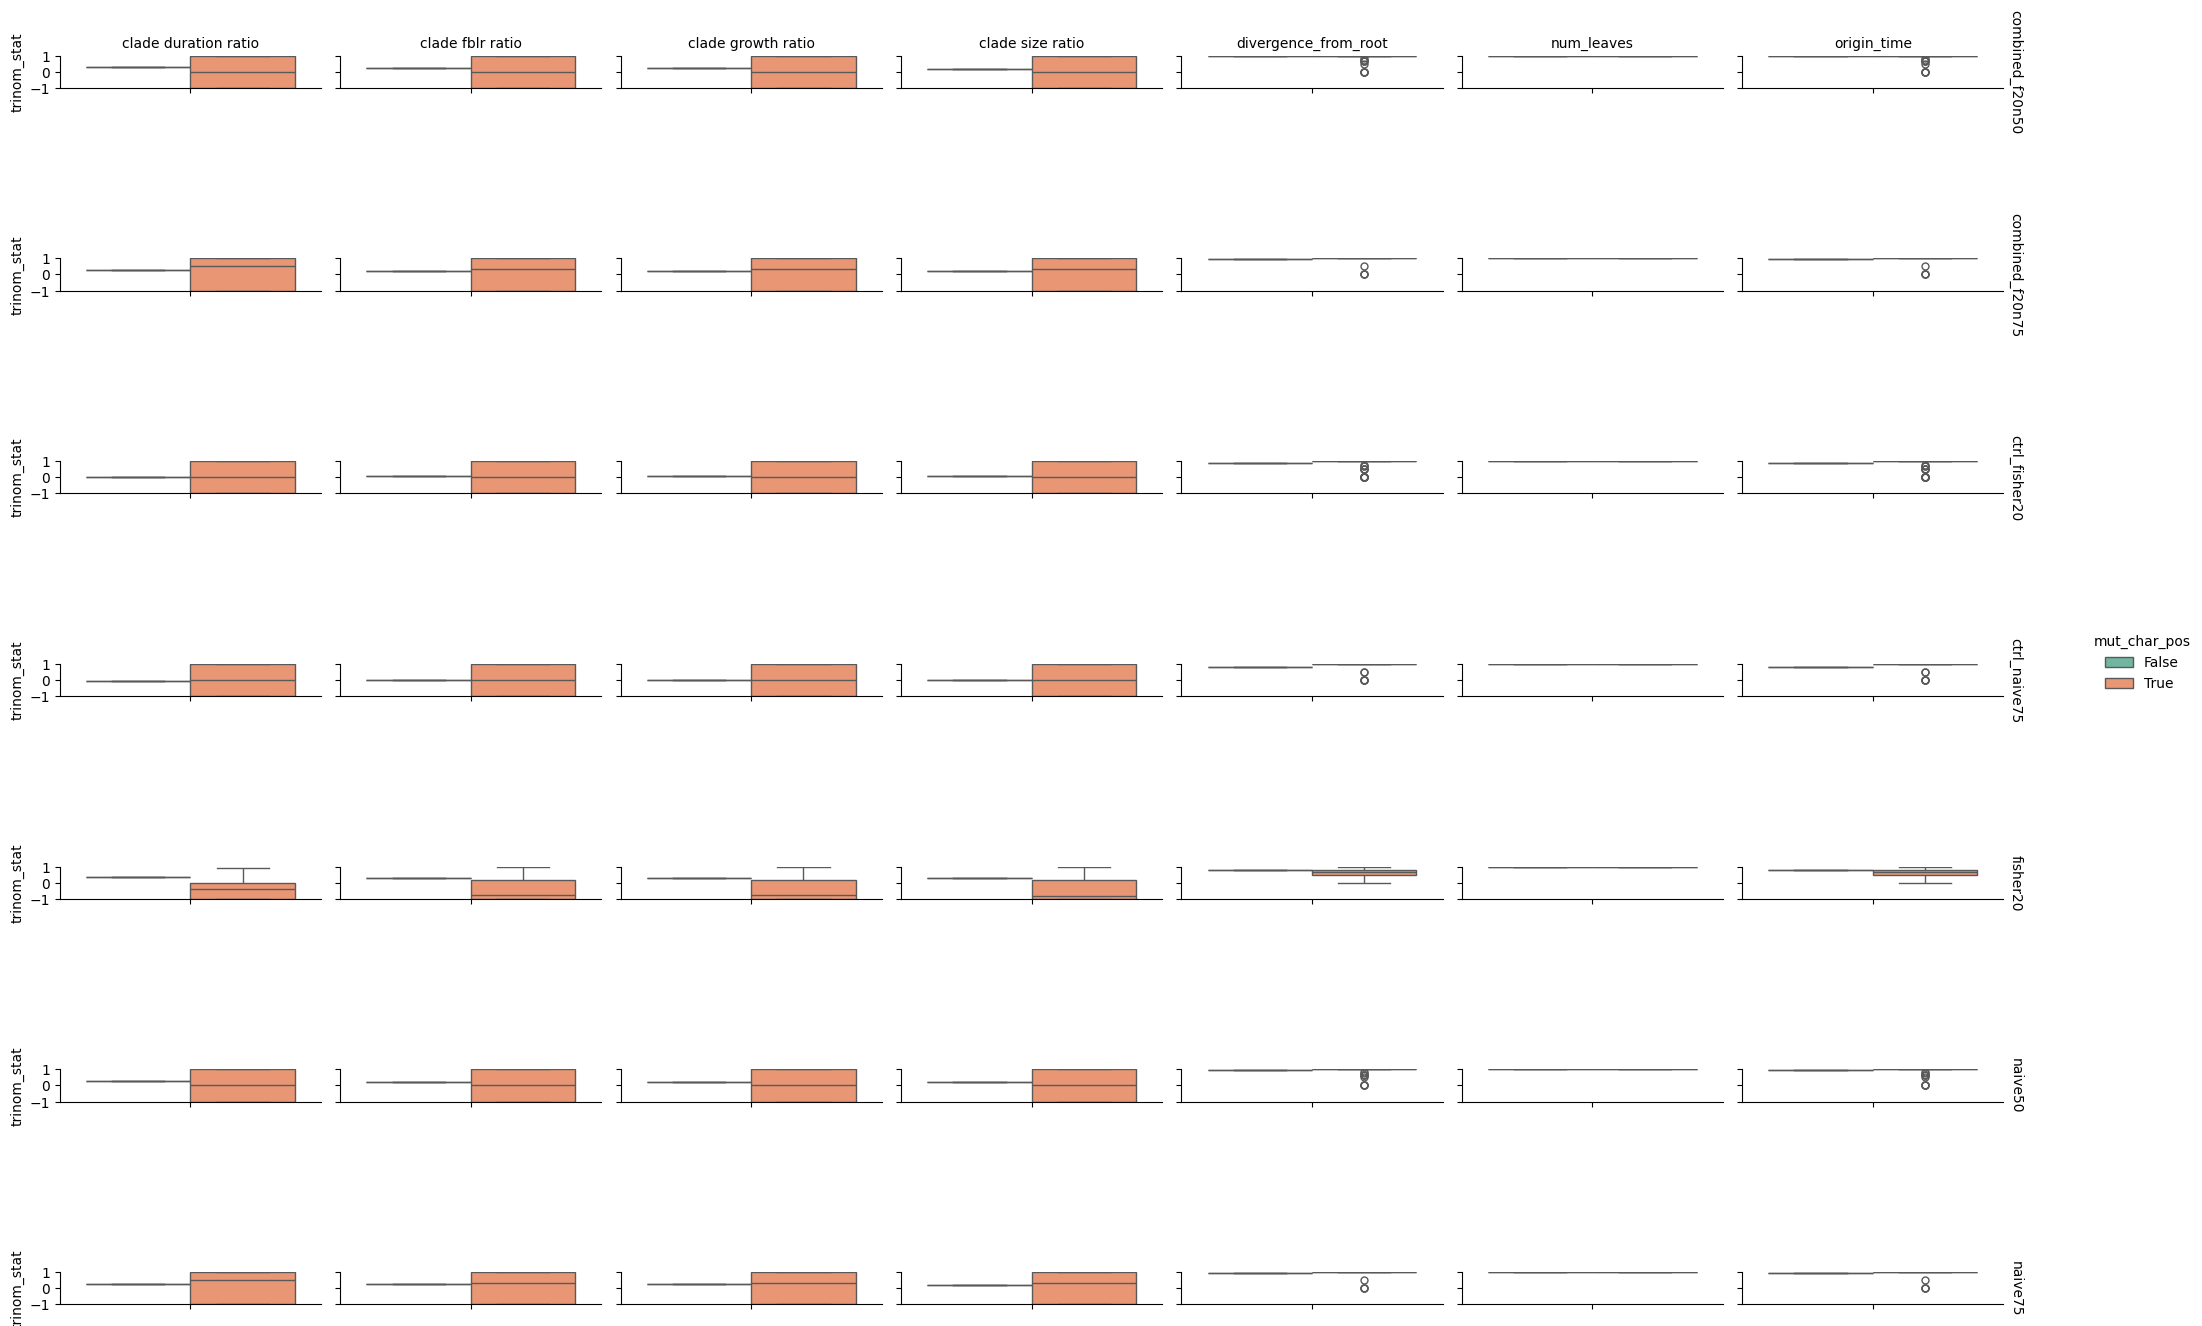

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


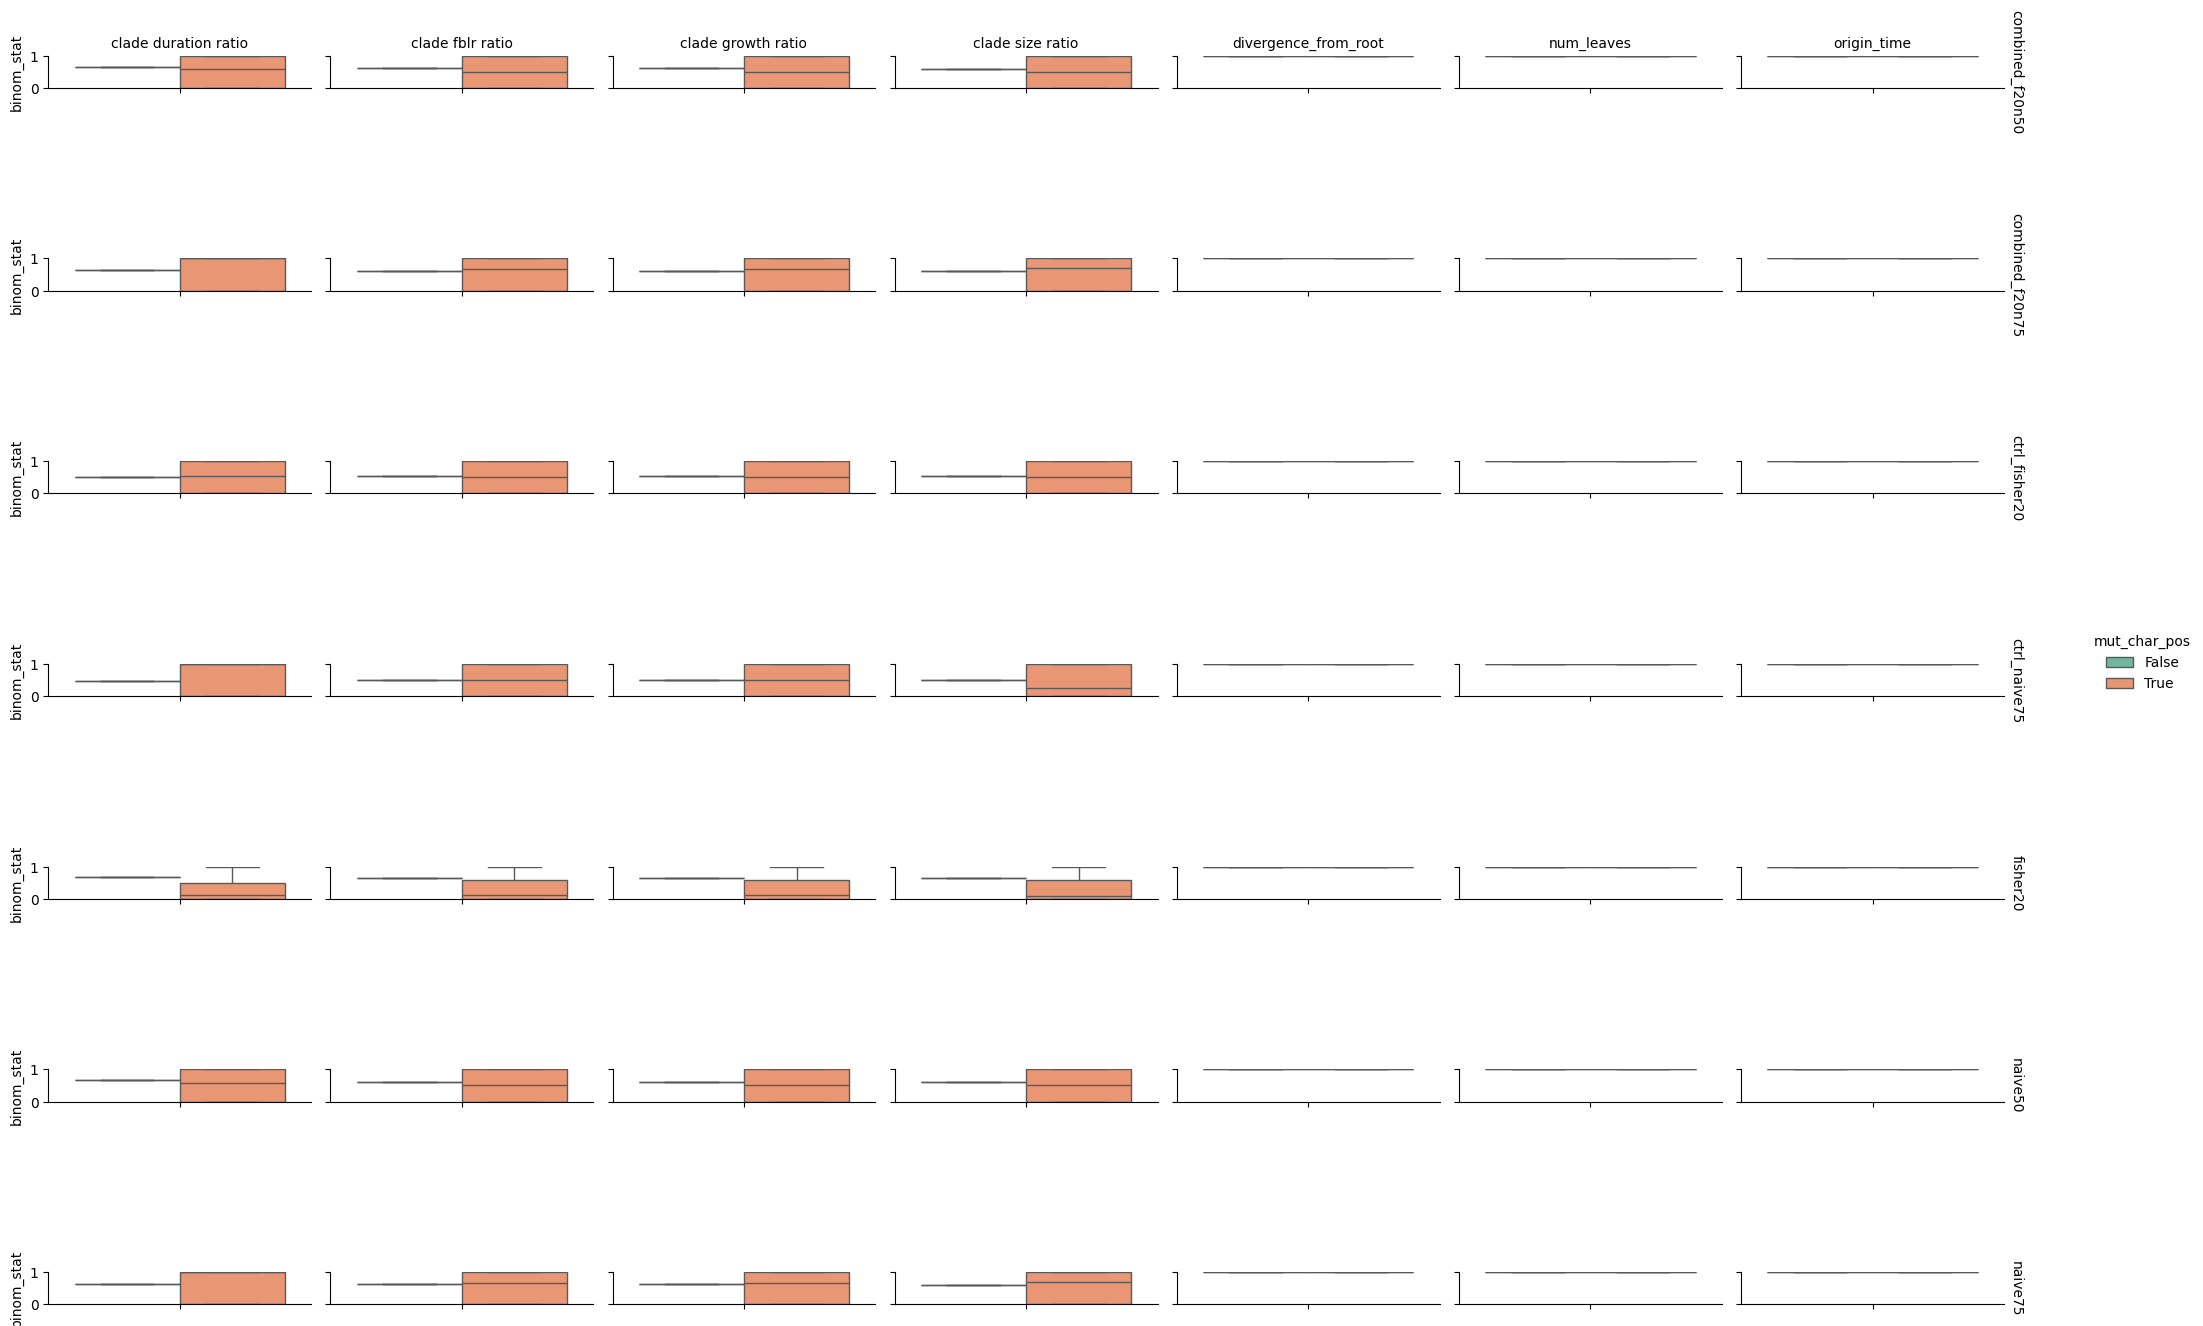

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


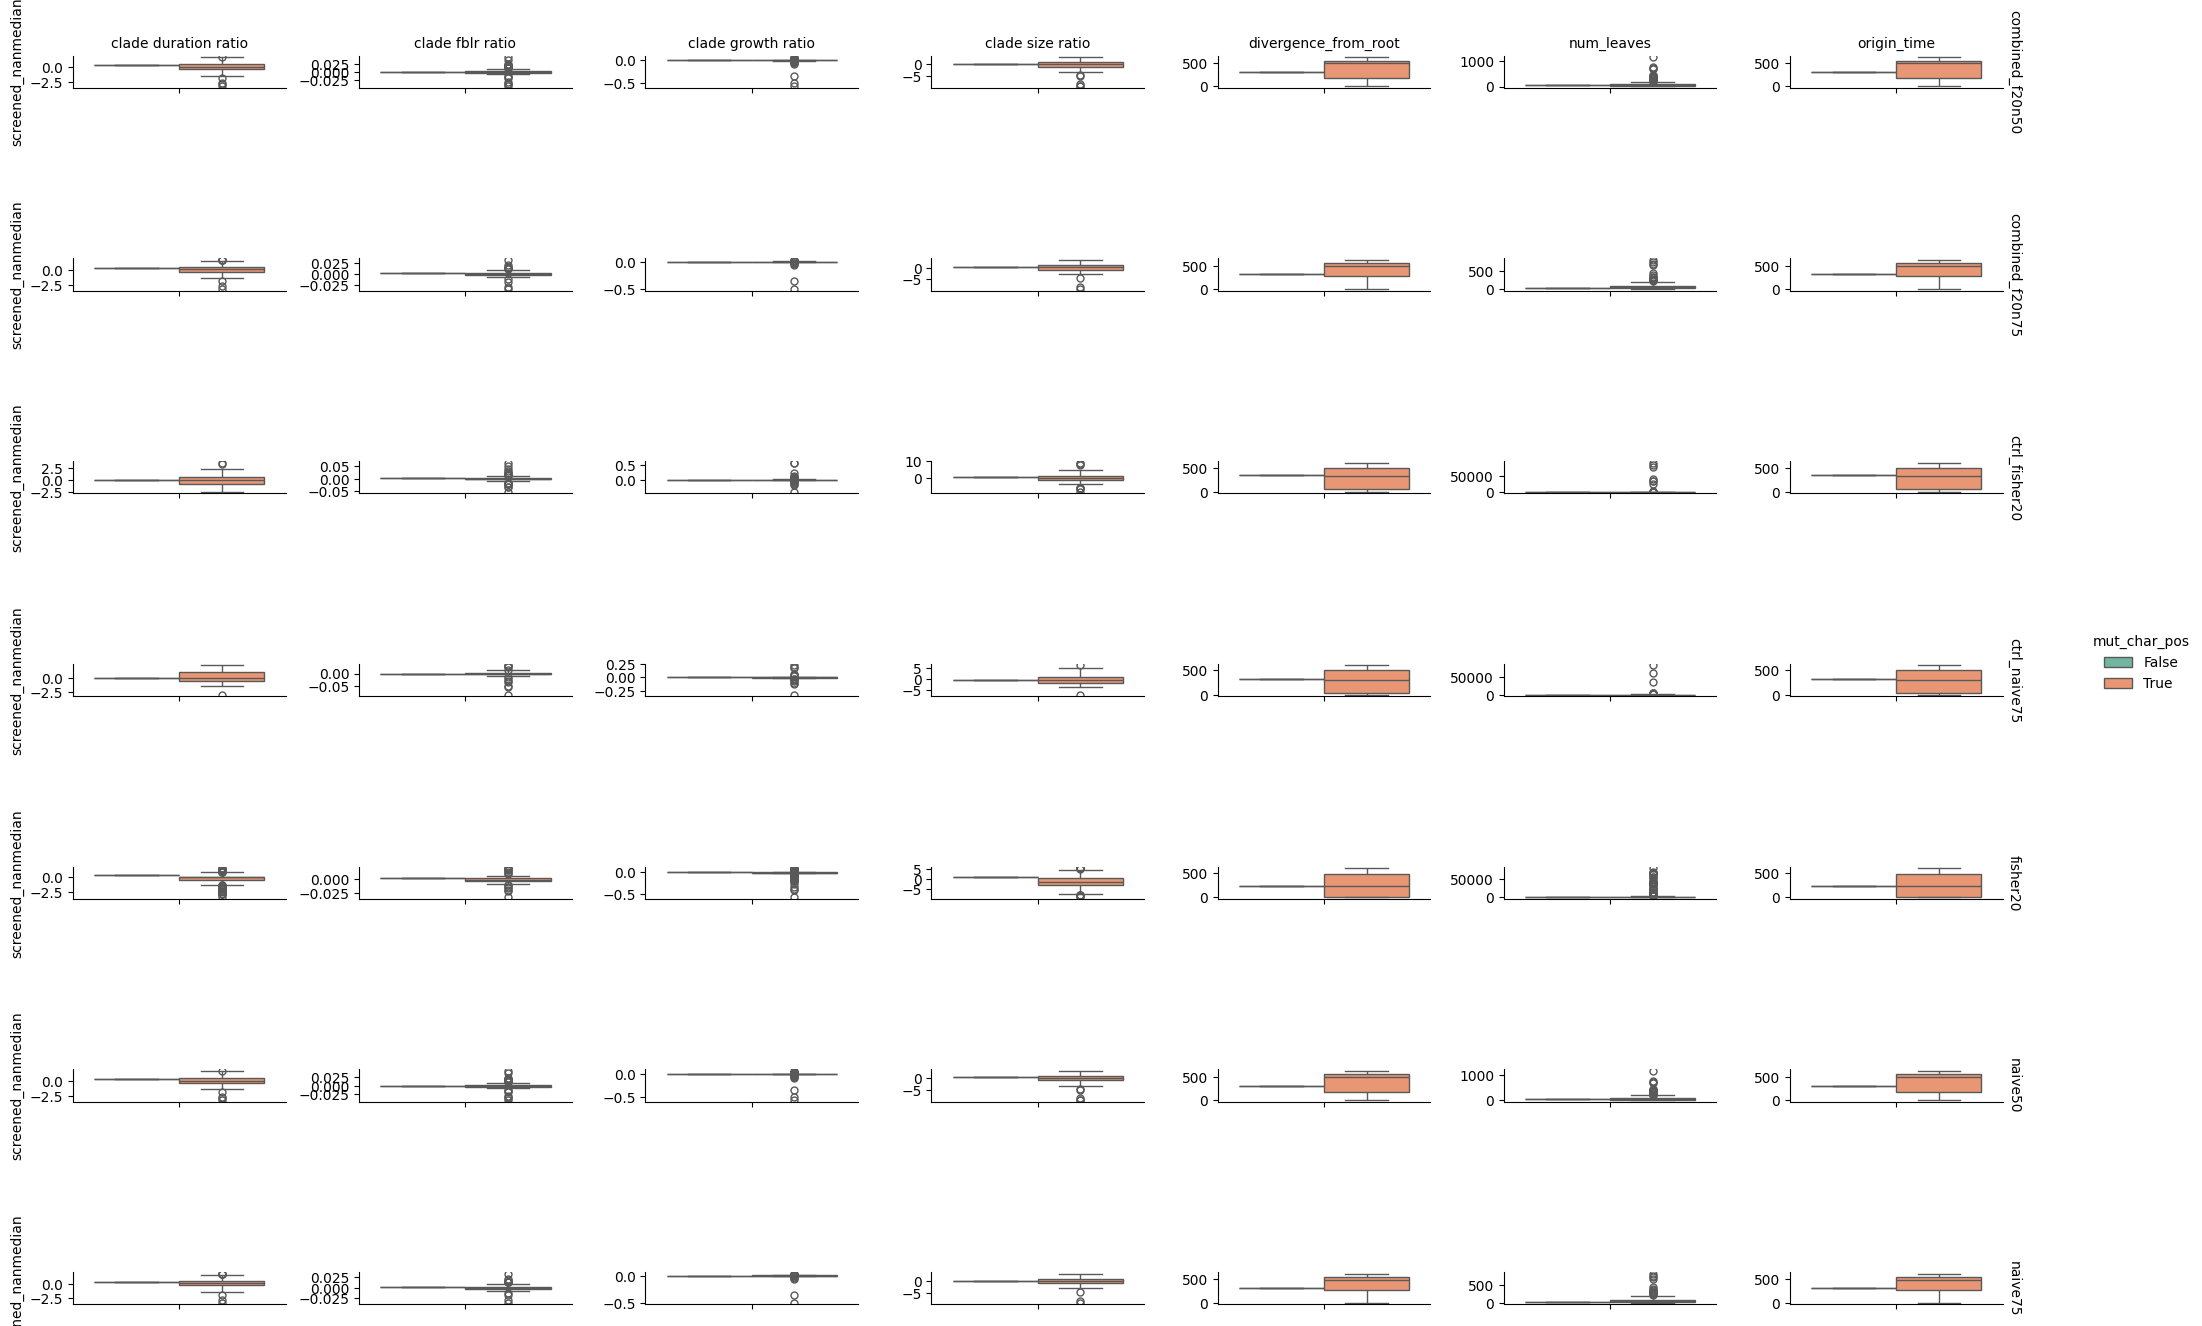

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


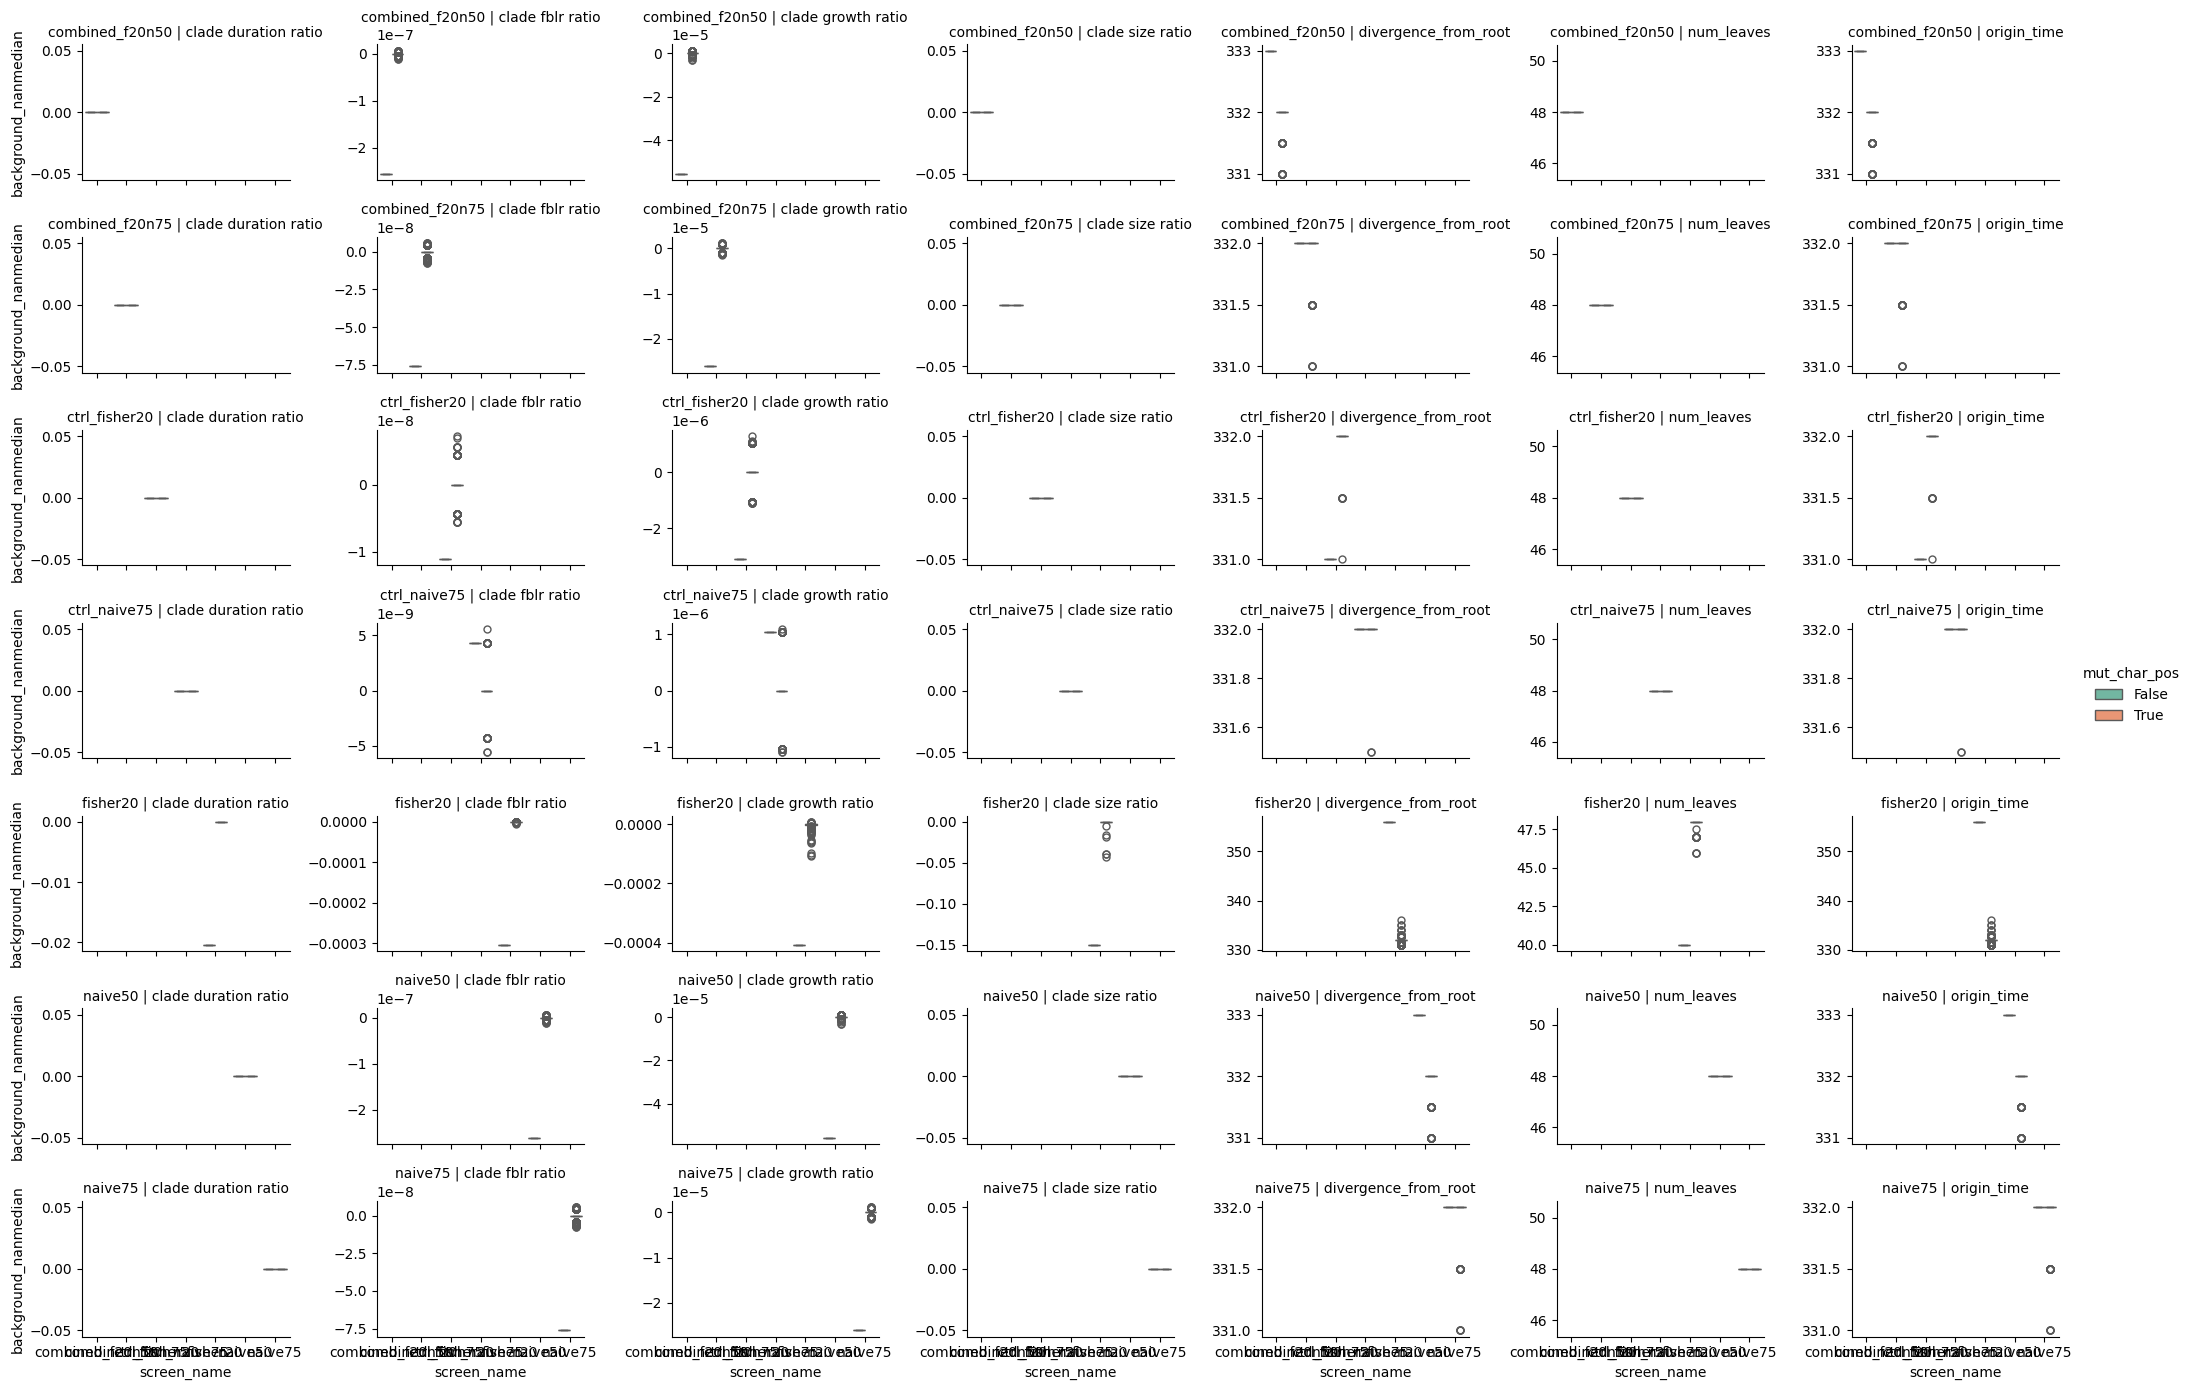

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
